<a href="https://colab.research.google.com/github/a103764/wi-parsing-matlab/blob/master/ML_Models_SIT_Honda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium


# data: SIT to Honda
df_sit_honda = pd.read_csv("sample_data/2024-11-22-11-39-28-0000--007-4384-2898-S.csv", delimiter=',', skiprows=0, low_memory=False)

In [110]:
# clean dataset
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.dropna()

# sample dataset
df_sampled = df_cleaned.iloc[::4]

# extract data
df_extracted = df_sampled[['Lat', 'Long', 'SS-RSRP\u200b (PCell)']]
df_extracted_renamed = df_extracted.rename(columns={'SS-RSRP\u200b (PCell)': 'RSRP'})
print(df_extracted_renamed.head())


         Lat        Long  RSRP
21  1.299879  103.781448 -90.9
29  1.299879  103.781448 -91.2
34  1.299909  103.781454 -91.2
38  1.299909  103.781454 -91.2
42  1.299909  103.781454 -91.2


In [111]:
# preprocess data sets for ML application
from sklearn.model_selection import train_test_split

X = df_extracted_renamed[['Lat', 'Long']]
y = df_extracted_renamed['RSRP']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# choose and fit a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# option 1: random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

# option 2: linear regression model
#model = LinearRegression()

In [113]:
# train and evaluate model
from sklearn.metrics import mean_squared_error, r2_score

model.fit(X_train, y_train)

# predict using model
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 16.129945424959004
R-squared: 0.7723223403635638


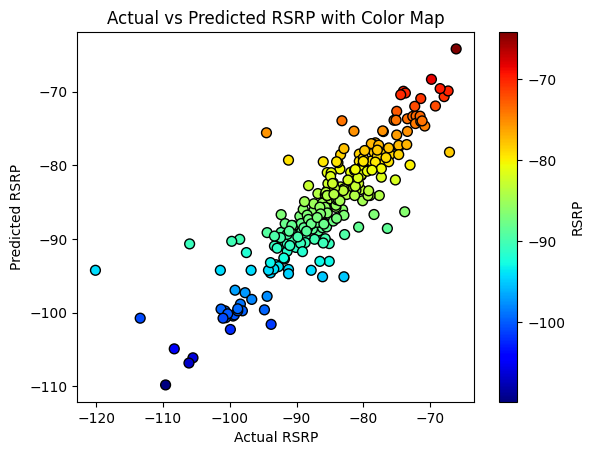

In [114]:
# scatter plot actual vs predicted with color mapping based on RSRP - if model is good, we can see some correlation
scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='jet', s=50, edgecolors="k")

# Add a color bar to represent the RSRP value range
plt.colorbar(scatter, label='RSRP')

# Add labels and title
plt.xlabel('Actual RSRP')
plt.ylabel('Predicted RSRP')
plt.title('Actual vs Predicted RSRP with Color Map')

# Show the plot
plt.show()

In [108]:
len(y_pred)

265